# Chapter 6. Application

In this chapter, we explore how to implement signal-processing knowledge in real-life applications.



# Introduction

The main goal of this chapter is to clearly demonstrate, using an applied example, how to use EEG signals for applied problems.
Here we will look at an example of determining stress levels. And here we have the most interesting and complicated tasks.


# Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [1]:
import sys
import time
import  matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from scipy import signal
import numpy as np
from scipy.integrate import simps
from scipy import signal
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset
Here we have an example dataset of mornings and evenings after a busy day at work. Stress is expected to be low in the morning and high in the evening. This is a great dataset for detecting stress levels.

Index(['Unnamed: 0', 'ch1'], dtype='object')
(10000, 2)


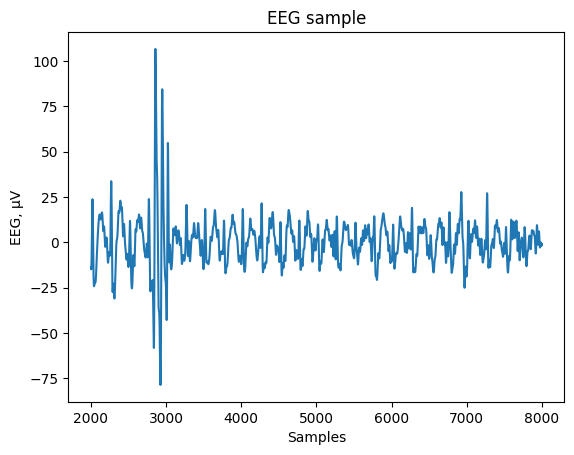

In [3]:
data_1_morning = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/1_morning.xlsx"
data_1_evening = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/1_evening.xlsx"
data_2_morning = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/2_morning.xlsx"
data_2_evening = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/2_evening.xlsx"
data_3_morning = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/3_morning.xlsx"
data_3_evening = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/3_evening.xlsx"
data_4_morning = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/4_morning.xlsx"
data_4_evening = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/4_evening.xlsx"
data_5_morning = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/5_morning.xlsx"
data_5_evening = "/content/drive/MyDrive/EEG_course/dataset/dataset_emotional/5_evening.xlsx"


data = pd.read_excel(data_1_morning)
print(data.columns)
print(data.shape)
data = data["ch1"]
plt.xlabel('Samples')
plt.ylabel('EEG, μV')
plt.title('EEG sample')
plt.plot(data[2000:8000]) # use the clean data
plt.show()



**Approximate Entropy (ApEn)**:

ApEn analyzes time series data from EEG recordings, typically using segments of  the data points (few seconds of EEG signal).  
It calculates the probability that similar patterns of observations will remain similar in the next incremental comparisons.

Definition: ApEn measures the likelihood that patterns that are similar within a dataset will remain similar when additional data points are included.
Application: It is often used to assess the regularity or predictability of EEG signals. Lower ApEn values suggest more regular patterns.

Reasons for Calculating Entropy in EEG Signals
Quantifying Complexity: Entropy provides a quantitative measure of the complexity of EEG signals, which can be indicative of different states of brain function or dysfunction.
Detecting Changes in Brain States: Entropy can be used to detect transitions between different brain states, such as from wakefulness to sleep, or during different cognitive tasks.

Monitoring Brain Activity: Entropy is useful for monitoring brain activity in real-time, providing insights into how the brain responds to various stimuli or conditions.

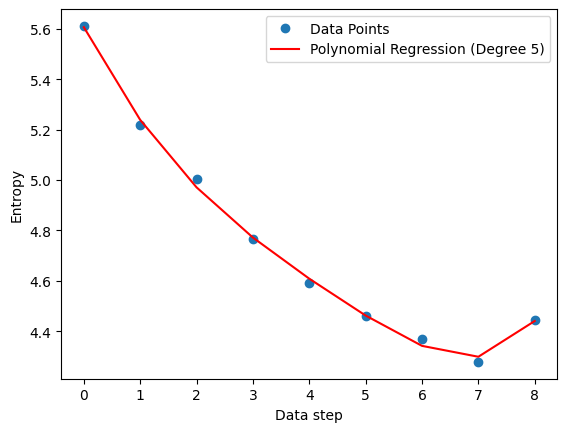

In [4]:
"""
The script iterates over increasing data segments, calculates their differential entropy,
 and stores these values. It then fits a polynomial regression to the entropy data
 and plots both the entropy values
and the fitted polynomial curve to visualize the relationship between data EEG in different time and entropy.
"""
from scipy.stats import differential_entropy, norm

data_ent_graph = []

for a in range (1000, len(data), 1000):
    values = data[:a]
    data_ent_final = differential_entropy(values)
    data_ent_graph.append(data_ent_final)

x_inter_removed_high = []
for data_x in range (0, len(data_ent_graph),1):
    x_inter_removed_high.append(data_x)

degree = 5

# Polynomial regression
coefficients = np.polyfit(x_inter_removed_high, data_ent_graph, degree)
# Polynomial coefficients
y_poly = np.polyval(coefficients, x_inter_removed_high)

plt.xlabel('Data step')
plt.ylabel('Entropy')
plt.plot(x_inter_removed_high, data_ent_graph, 'o', label='Data Points')
plt.plot(x_inter_removed_high, y_poly, 'r', label=f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()

Calculating the Power Spectral Density (PSD) for EEG signals is essential for various applied tasks because it provides valuable information about the distribution of power across different frequency components of the signal. This analysis is crucial in several contexts:

1. Sleep Studies
Sleep Stages Classification: Different sleep stages (e.g., REM, NREM) are characterized by distinct frequency patterns. PSD helps identify these stages by highlighting the dominant frequencies associated with each stage.

Mental State Analysis: Different cognitive states (e.g., attention, relaxation) are associated with specific EEG frequency bands (e.g., alpha, beta). PSD helps in quantifying these states by analyzing the power in these frequency bands.

Mental Health Assessment: Conditions like depression and anxiety can manifest as specific changes in EEG frequency content. PSD analysis can aid in the assessment and understanding of these mental health conditions.

Noise and Artifact Identification: By analyzing the PSD, it is possible to identify and remove noise and artifacts (e.g., muscle activity, eye blinks) from EEG signals, leading to cleaner and more accurate data for further analysis.

**Tasks**
make compariosn beetwen data for evening and morinig

**Expectation**
Should be detected visually some deiffrence beetwen entropy for4 eveninf and morning. Find optimal lenght for calcaulte entropy to much mire clearly visualisate diferrence uin entropy beetwen evening and morning

**Welch**

Previously we considered FFT  
Welch's Method
Welch's method is a technique for estimating the power spectral density (PSD) of a signal. It improves upon the basic periodogram method by reducing noise in the estimated spectrum. Welch's method involves the following steps:

Welch's Method: By averaging the FFTs of overlapping segments, Welch’s method provides a smoother and more reliable estimate of the PSD, reducing variance.
FFT: A single FFT of the entire signal can be noisy and less reliable, particularly for short or non-stationary signals.

Both Welch's method and FFT are valuable tools in EEG analysis, each with its own strengths. Welch's method is preferred for its accuracy and reliability in estimating power spectral densities, while the FFT is favored for its computational efficiency and speed. The choice between the two depends on the specific requirements of the EEG analysis task at hand.

But here for us is important accuracy

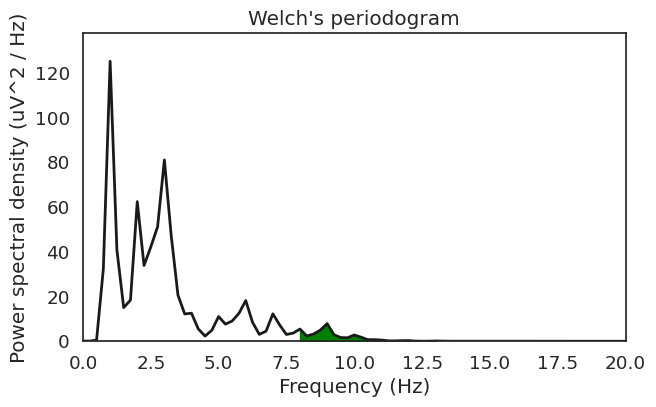

Absolute delta power: 8.324 uV^2


<ipython-input-5-86506fa3bd57>:53: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  delta_power = simps(psd[idx_delta], dx=freq_res)


In [5]:
"""
This script calculates and visualizes the power spectral density (PSD) of a data segment using Welch's method,
highlights the alpha frequency band, and computes the absolute power within this band.
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.integrate import simps

data_short = data[1000:8000]

#sns.set(font_scale=1.2)

# Define sampling frequency and time vector
# convert samples to time

# Define window length (4 seconds)
sf = 250
win = 4 * sf
freqs, psd = signal.welch(data_short, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')

# Define delta lower and upper limits
low, high = 8, 13  # Delta Waves: Up to 4 Hz
                   # Alpha Waves: 8 - 13 Hz
                   # Theta Waves: 4-7 Hz
                   # Gamma Waves: 30-100 Hz

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')

plt.fill_between(freqs, psd, where=idx_delta, color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 20])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.show()


# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)

print('Absolute delta power: %.3f uV^2' % delta_power)

So know the absolute delta power you can start using for some applied tasks like mental control, sleep control, etc

**Tasks**  
Make comparison for all data between channels for evening and morning for different frequency range
                   # Delta Waves: Up to 4 Hz
                   # Alpha Waves: 8 - 13 Hz
                   # Theta Waves: 4-7 Hz
                   # Gamma Waves: 30-100 Hz

Find optimal freuence range and find opimla signal processing method to increase diffwerence beetwen power in range for evening and morning


**Expected Observations and Discussion**          
In this case, depending on your task, you can determine the required frequency range in which you can work.

* Delta (0.5 - 4 Hz): Associated with deep sleep stages and unconscious brain activity.  
* Theta (4 - 8 Hz): Linked to drowsiness, meditation, and early stages of sleep.  
* Alpha (8 - 12 Hz): Related to relaxed, calm, and wakeful states, often seen when eyes are closed.  
* Beta (12 - 30 Hz): Associated with active thinking, focus, and problem-solving, as well as active attention and alertness.  
* Gamma (30 - 100 Hz): Linked to higher cognitive functions, such as perception, problem-solving, and consciousness.  



**Final Task:** Stress Control Classification via Power Level Analysis
The final task involves classifying stress control based on the power level in a given frequency range of an EEG signal. Your task is to develop a Python script that can analyze the EEG data for evening and for morning and demonstrate difference in the stress level via the power level in the specified frequency range.
To complete this task, you will need to apply the knowledge and skills acquired throughout the course, including:
EEG signal preprocessing
Frequency domain analysis (e.g., Fourier Transform, Wavelet Transform)
Feature extraction (e.g., power spectral density, band power)

  **Thank you from PiEEG any suggestion please send to pieeg@pieeg.com**  


In the next course Pytohn and ML for EEG, we will show more examples for applied tasks